In [3]:
import pandas as pd

# Cargar el nuevo dataset con el nombre de archivo correcto
df = pd.read_csv('Tetuan_City_power_consumption.csv')

# Exploración inicial
print("--- Primeras 5 filas ---")
print(df.head())

print("\n--- Información del DataFrame ---")
df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'Tetuan_City_power_consumption.csv'

In [4]:
import os

# List all files in the current directory
files_in_directory = os.listdir('.')

# Print the list
print("Files found in this directory:")
print(files_in_directory)


Files found in this directory:
['.venv', 'analisis_potencia.ipynb', 'app_prediccion.py', 'app_web.py', 'ejercicios_dia3.py', 'household_power_consumption.txt', 'modelo_potencia.joblib', 'proyecto_tetuan.ipynb', 'Tetuan City power consumption.csv']


In [5]:
import pandas as pd

# Cargar el nuevo dataset con el nombre de archivo correcto
df = pd.read_csv('Tetuan City power consumption.csv')

# Exploración inicial
print("--- Primeras 5 filas ---")
print(df.head())

print("\n--- Información del DataFrame ---")
df.info()

--- Primeras 5 filas ---
        DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
1  1/1/2017 0:10        6.414      74.5       0.083                  0.070   
2  1/1/2017 0:20        6.313      74.5       0.080                  0.062   
3  1/1/2017 0:30        6.121      75.0       0.083                  0.091   
4  1/1/2017 0:40        5.921      75.7       0.081                  0.048   

   diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0          0.119               34055.69620                16128.87538   
1          0.085               29814.68354                19375.07599   
2          0.100               29128.10127                19006.68693   
3          0.096               28228.86076                18361.09422   
4          0.085               27335.69620                17872.34043   

   Zone 3  Power Consumption  
0                20240.96386  
1    

In [4]:
import pandas as pd

# It's good practice to reload the data in a new step
# Replace 'YOUR_FILE_NAME.csv' with the actual name of the file you loaded
df = pd.read_csv('Tetuan City power consumption.csv')

# 1. Clean up column names
df.columns = df.columns.str.replace(' ', '_')

# 2. Convert 'Datetime' to a proper datetime object and set as index
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.set_index('DateTime')

# 3. Verify the changes
print("--- Cleaned DataFrame Info ---")
df.info()

print("\n--- First 5 rows of Cleaned Data ---")
print(df.head())

--- Cleaned DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                52416 non-null  float64
 1   Humidity                   52416 non-null  float64
 2   Wind_Speed                 52416 non-null  float64
 3   general_diffuse_flows      52416 non-null  float64
 4   diffuse_flows              52416 non-null  float64
 5   Zone_1_Power_Consumption   52416 non-null  float64
 6   Zone_2__Power_Consumption  52416 non-null  float64
 7   Zone_3__Power_Consumption  52416 non-null  float64
dtypes: float64(8)
memory usage: 3.6 MB

--- First 5 rows of Cleaned Data ---
                     Temperature  Humidity  Wind_Speed  general_diffuse_flows  \
DateTime                                                                        
2017-01-01 00:00:00       

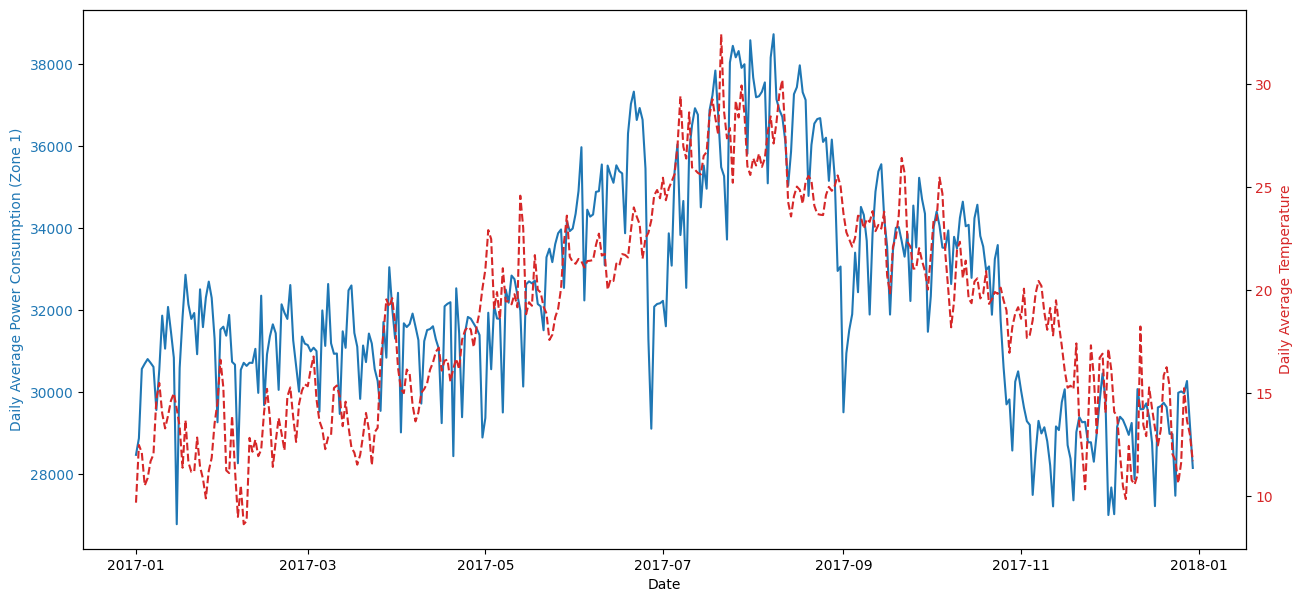

In [5]:
import matplotlib.pyplot as plt

# 1. Resample data to daily averages for a clearer trend
df_daily = df.resample('D').mean()

# 2. Create the dual-axis plot
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot Zone 1 Power Consumption on the first Y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Average Power Consumption (Zone 1)', color=color)
ax1.plot(df_daily.index, df_daily['Zone_1_Power_Consumption'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create the second Y-axis for Temperature
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Daily Average Temperature', color=color)
ax2.plot(df_daily.index, df_daily['Temperature'], color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
